In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.html.widgets import interact, fixed
from scipy.integrate import odeint, quad

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
theta_s=np.linspace(0,np.pi/2,10)
r=np.linspace(1,10,1000)
epsilon=[-1,0,1,2]


In [3]:
theta=[]
def theta_r(r,theta_s):
    for i in theta_s:
        theta.append(2*np.arctan((1/r)*np.tan(i/2)))
    return theta

In [4]:
sol=theta_r(r,theta_s)

In [72]:
def plot_theta(r,sol,i=0):
    plt.figure(figsize=(10,6))
    plt.xlim(0,11),plt.ylim(-0.5,2)
    plt.xlabel("$r$", fontsize=17), plt.ylabel("$\\theta(r)$ (radians)", fontsize=17)
    plt.plot(r,sol[i])
    plt.title("$\\theta(r)$ vs. $r$", fontsize=18)
    plt.tick_params(axis='x', labelsize='large')
    plt.tick_params(axis='y', labelsize='large')
    
    plt.show()

$\theta(r) \: vs. \: r$ with no elastic constants and $\theta_s$ going from $0$ to $\frac{\pi}{2}$

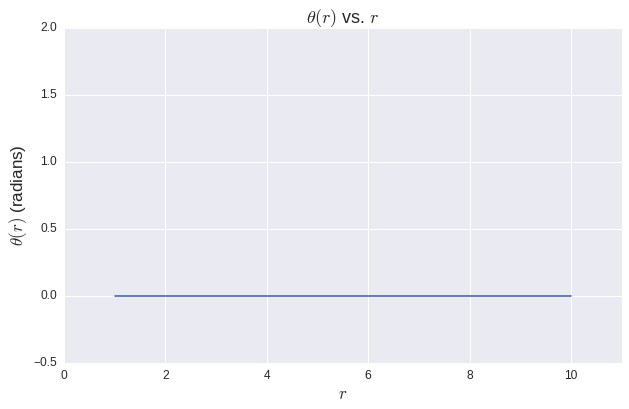

In [73]:
interact(plot_theta, r=fixed(r), sol=fixed(sol), i=(0,len(sol)-1));

In [51]:
def rad_to_deg_conv(sol):
    return [sol[i]*(180/np.pi) for i in range(10)]

In [52]:
theta_s1=rad_to_deg_conv(sol)[0]
theta_s2=rad_to_deg_conv(sol)[1]
theta_s3=rad_to_deg_conv(sol)[2]
theta_s4=rad_to_deg_conv(sol)[3]
theta_s5=rad_to_deg_conv(sol)[4]
theta_s6=rad_to_deg_conv(sol)[5]
theta_s7=rad_to_deg_conv(sol)[6]
theta_s8=rad_to_deg_conv(sol)[7]
theta_s9=rad_to_deg_conv(sol)[8]
theta_s10=rad_to_deg_conv(sol)[9]

In [53]:
def derivs(theta, r, epsilon):
    dtheta = -(1/r)*np.sqrt((np.sin(theta))**2 + epsilon*(np.sin(theta))**4)
    return dtheta

In [54]:
def solve_derivs(theta_s, r, epsilon):
    soln=[odeint(derivs, i, r, args=(epsilon,), atol=1e-11, rtol=1e-10) for i in theta_s]
    return soln

In [55]:
soln1 = solve_derivs(theta_s, r, epsilon[0])
soln2 = solve_derivs(theta_s, r, epsilon[1])
soln3 = solve_derivs(theta_s, r, epsilon[2])
soln4 = solve_derivs(theta_s, r, epsilon[3])

In [70]:
def plot_ode(r, soln1, soln2, soln3, soln4, j=0):
    plt.figure(figsize=(14,7))
    plt.plot(r,soln1[j],label='epsilon = -1')
    plt.plot(r,soln2[j],label='epsilon = 0')
    plt.plot(r,soln3[j],label='epsilon = 1')
    plt.plot(r,soln4[j],label='epsilon = 2')
    plt.xlim(0,11),plt.ylim(-0.1,1.7)
    plt.xlabel("$r$", fontsize=18), plt.ylabel("$\\theta(r) (radians)$", fontsize=18)
    plt.title("$\\theta(r)$ vs. $r$", fontsize=18)
    plt.tick_params(axis='x', labelsize='large')
    plt.tick_params(axis='y', labelsize='large')
    plt.legend(loc='best',fontsize='large')
    
    plt.show()

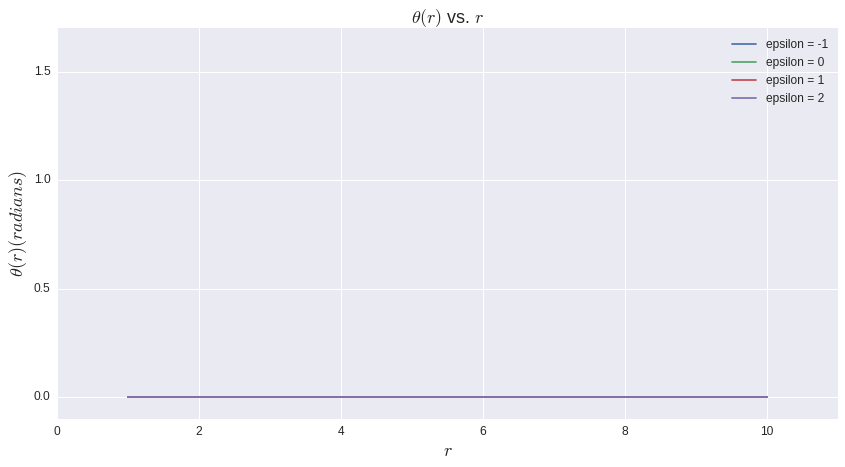

In [71]:
interact(plot_ode, r=fixed(r), soln1=fixed(soln1), soln2=fixed(soln2), soln3=fixed(soln3), soln4=fixed(soln4), j=(0,9));

In [60]:
theta_m=np.linspace(0,np.pi/2,50)

In [61]:
def integrand(theta, x):
    return -(np.sin(2*theta) + np.sqrt((np.sin(theta))**2 + x*(np.sin(theta))**4))

In [62]:
def F(f,x):
    I, e = quad(integrand, f, 0, args=(x,))
    return I

In [63]:
p=0
l=[]
while p < 50:
    for i in range(len(epsilon)):
        l.append(F(theta_m[p],epsilon[i]))
    p+=1

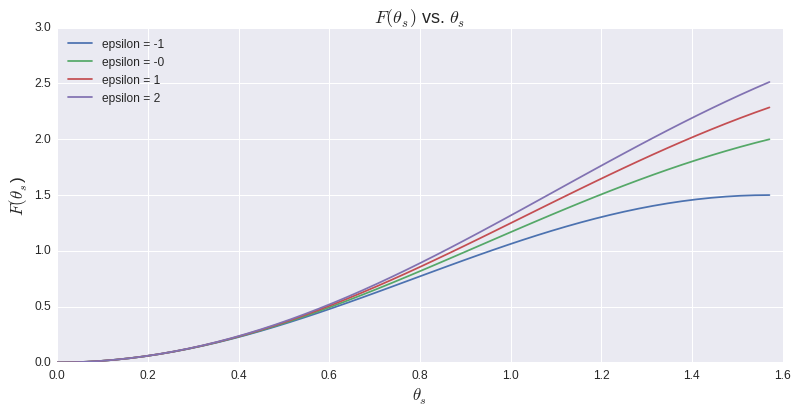

In [69]:
plt.figure(figsize=(13,6))
plt.plot(theta_m,l[0::4],label='epsilon = -1')
plt.plot(theta_m,l[1::4],label='epsilon = -0')
plt.plot(theta_m,l[2::4],label='epsilon = 1')
plt.plot(theta_m,l[3::4],label='epsilon = 2')
plt.xlabel('$\\theta_s$', fontsize=17)
plt.ylabel('$F(\\theta_s$)', fontsize=17)
plt.title('$F(\\theta_s)$ vs. $\\theta_s$', fontsize=18)
plt.tick_params(axis='x', labelsize='large')
plt.tick_params(axis='y', labelsize='large')
plt.legend(loc='best', fontsize='large');